In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset

merged_data = pd.merge(city_data,ride_data, on="city")

# Display the data table for preview
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

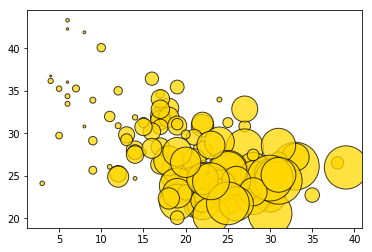

In [3]:
# Obtain the x and y coordinates for each of the three city types
city_grouped = merged_data.groupby(["type","city"])
total_rides_per_city = (city_grouped)["ride_id"].count()
avg_fare = city_grouped["fare"].mean()

sum_fare = city_grouped["fare"].sum()
len_fare = len(city_grouped)
s = city_grouped["driver_count"].sum()


x_axis = total_rides_per_city
y_axis = avg_fare


# Build the scatter plots for each city types

plt.scatter(x_axis, y_axis, marker="o", color=['gold'], edgecolors="black",
            s=s, alpha=0.75)
# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

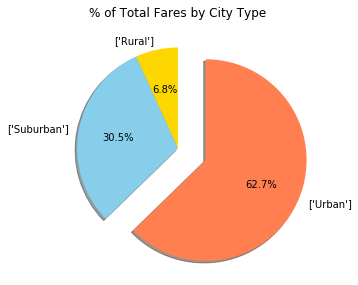

In [43]:
# Calculate Type Percents
type_grouped = merged_data.groupby(["type"])
type_totals = merged_data["type"].value_counts()
fare_totals = type_grouped["fare"].sum()
fare_percents = (fare_totals/len(merged_data["type"]))*100


fig = plt.figure(figsize=(7,6))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("% of Total Fares by City Type")

fares_labels = type_grouped.type.unique()
x = fare_percents
explode = (0, 0, 0.3)



# Build Pie Chart
plt.pie(x,labels=fares_labels, explode=explode, colors=['gold','skyblue','coral'],autopct="%1.1f%%", shadow=True, 
        startangle=90)
# Save Figure
fig.savefig("../matplotlib/images/totalridesbycity.png")



## Total Rides by City Type

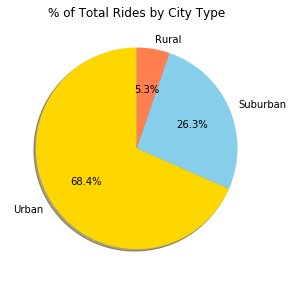

In [30]:
# Calculate Ride Percents
type_grouped = merged_data.groupby(["type"])
type_totals = merged_data["type"].value_counts()
rides_percents = (type_totals/len(merged_data["type"]))*100


fig = plt.figure(figsize=(7,6))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("% of Total Rides by City Type")

rides_labels = merged_data.type.unique()
x = rides_percents



# Build Pie Chart
plt.pie(x,labels=rides_labels, colors=['gold','skyblue','coral'],autopct="%1.1f%%", shadow=True, 
        startangle=90)
# Save Figure
fig.savefig("../matplotlib/images/totalridesbycity.png")

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

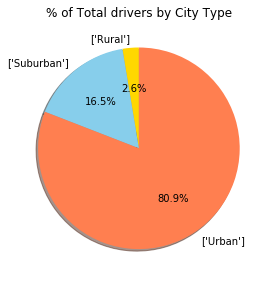

In [65]:
# Calculate Driver Percents
drop_dupes = merged_data.drop_duplicates(["city"])
type_grouped = drop_dupes.groupby(["type"])
driver_totals = type_grouped["driver_count"].sum()
driver_percents = ((driver_totals/drop_dupes["driver_count"].sum()*100))


fig = plt.figure(figsize=(7,6))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("% of Total drivers by City Type")

drivers_labels = type_grouped.type.unique()
x = driver_percents



# Build Pie Chart
plt.pie(x,labels=drivers_labels, colors=['gold','skyblue','coral'],autopct="%1.1f%%", shadow=True, 
        startangle=90)
# Save Figure
fig.savefig("../matplotlib/images/totaldriversbycity.png")

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()